<h1>Obesity Data</h1>


<h3>Introduction</h3>
As a zombie, one of the most important factors of survival is finding food. In many zombie movies, tv shows, and books, the zombies' prime motivations are consuming humans. In analyzing obesity data in Pittsburgh, we can determine which areas a zombie should target to consume the best food source.

<h3>The Metric</h3>
The metric studied is obesity rates in Pittsburgh. In order to determine the metric for best food source, we considered amount of food, quality of food, and availability of food. Areas with high obesity rates would provide a larger quantity of food for zombies to consume. 

In [52]:
# load pandas, geopandas, numpy, shapely, and matplotlib
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely import wkt
%matplotlib inline

# load obesity data and map data
obesity_data_pandas = pd.read_csv("obesity-ac-2006-2010censustracts.csv", index_col="stname")
pitt_map = pd.read_csv("parcelcoords.csv")

<h3>Working with Obesity Data</h3>

In [53]:
# display obesity data
obesity_data_pandas

,tractfips,2000 Tract,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,2006-2010 estimate of obesity
stname,,,,,,,
Pennsylvania,42003010300,10300,NaN,PITTSBURGH,Pittsburgh,Bluff,0.246936
Pennsylvania,42003020100,20100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012
Pennsylvania,42003020300,20300,NaN,PITTSBURGH,Pittsburgh,Strip District,0.369996
Pennsylvania,42003030500,30500,NaN,PITTSBURGH,Pittsburgh,Crawford Roberts,0.488691
Pennsylvania,42003040200,40200,NaN,PITTSBURGH,Pittsburgh,West oakland,0.366391
...,...,...,...,...,...,...,...
Pennsylvania,42003980600,210800,980600,PITTSBURGH,Pittsburgh,Chateau,0.439386
Pennsylvania,42003980700,192100,980700,PITTSBURGH,Pittsburgh,South Shore,0.354375
Pennsylvania,42003981200,220500,563200 & 981200,PITTSBURGH,Pittsburgh,North Shore,0.121487


In [54]:
# summarize obesity data
obesity_data_pandas.describe()

,tractfips,2000 Tract,2006-2010 estimate of obesity
count,4.160000e+02,416.000000,416.000000
mean,4.200341e+10,370111.362981,0.299506
std,1.718501e+05,157105.562154,0.113258
min,4.200301e+10,10300.000000,0.070353
25%,4.200331e+10,220575.000000,0.240699
50%,4.200346e+10,436500.000000,0.282818
75%,4.200352e+10,487275.000000,0.313238
max,4.200398e+10,561500.000000,0.922932


In [101]:
# filter obesity rates by neighborhood and sort from highest rate to lowest rate
obesity_rates_by_neighborhood = obesity_data_pandas.groupby("City Neighborhood").mean()['2006-2010 estimate of obesity']
obesity_rates_by_neighborhood.sort_values(ascending=False)

City Neighborhood
Northview Heights       0.922932
Fairywood               0.820311
California Kirkbride    0.771046
Saint Clair             0.699500
Terrace Village         0.674103
                          ...   
Central Oakland         0.128668
Shadyside               0.127718
Squirrel Hill North     0.125941
North Shore             0.121487
North Oakland           0.104579
Name: 2006-2010 estimate of obesity, Length: 91, dtype: float64

In [102]:
# filter obesity rates by municipality and sort from highest rate to lowest rate
obesity_rates_by_municipality = obesity_data_pandas.groupby("Municipality").mean()['2006-2010 estimate of obesity']
obesity_rates.sort_values(ascending=False)

Municipality
Braddock             0.482443
Rankin               0.454090
Wilkinsburg          0.446181
Duquesne             0.404287
North Braddock       0.390146
                       ...   
Thornburg            0.161278
Edgeworth            0.150778
Rosslyn Farms        0.145470
Fox Chapel           0.144490
Ben Avon Heights     0.127446
Name: 2006-2010 estimate of obesity, Length: 130, dtype: float64

<h3>Displaying Obesity Data</h3>

After determining the areas with the greatest obesity rates, 

In [ ]:
# read shapefiles
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
municipalities = gpd.read_file("Allegheny_County_Municipal_Boundaries-shp/LandRecords_LANDRECORDS_OWNER_Municipalities.shp")

In [82]:
# merge neighborhood obesity data with neighborhood map
neighborhoods_map = neighborhoods.merge(obesity_rates_by_neighborhood, how='left', left_on='hood', right_on='City Neighborhood')
# look at the head to confirm it merged correctly
neighborhoods_map[['hood','2006-2010 estimate of obesity','geometry']].head()

,hood,2006-2010 estimate of obesity,geometry
0,Chateau,0.439386,"POLYGON ((-80.02999 40.45909, -80.02989 40.458..."
1,Summer Hill,0.302258,"POLYGON ((-80.01078 40.49975, -80.01073 40.499..."
2,Northview Heights,0.922932,"POLYGON ((-80.00327 40.48271, -80.00325 40.482..."
3,Spring Hill-City View,NaN,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
4,Perry South,0.453424,"POLYGON ((-80.01422 40.47745, -80.01435 40.477..."


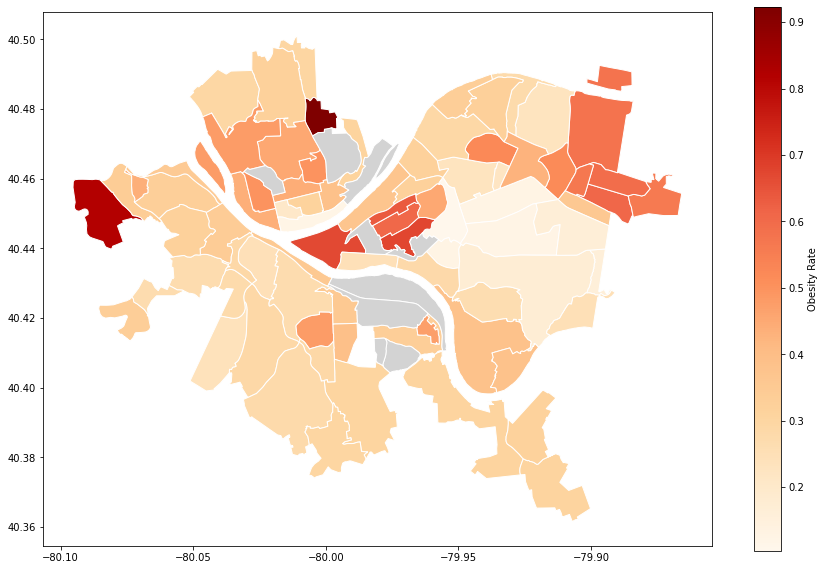

In [85]:
# draw colored map of neighborhoods with obesity rate
neighborhoods_map.plot(column='2006-2010 estimate of obesity', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Obesity Rate"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

In [103]:
municipalities['NAME'] = municipalities['NAME'].str.capitalize()
municipalities.head()

,FID,NAME,TYPE,LABEL,COG,SCHOOLD,CONGDIST,FIPS,REGION,ACRES,...,CNTL_ID,CNTYCOUNCI,EOC,ASSESSORTE,VALUATIONA,YEARCONVER,GlobalID,SHAPE_Leng,SHAPE_Area,geometry
0,1,Cheswick,BOROUGH,Cheswick Borough,Allegheny Valley North,Allegheny Valley,4,13392,NH,350.191284,...,003100,7,NEWCOM,East,Alle-Kiski Valley,1966.0,{F29648DC-0D4F-4E35-8F2D-7B465DCFF308},15780.076352,1.532602e+07,"POLYGON ((1400209.250 448114.516, 1400220.901 ..."
1,4,Edgeworth,BOROUGH,Edgeworth Borough,Quaker Valley,Quaker Valley,20,22576,AA,1030.743774,...,003170,1,Northwest Regional,North,Northwest,1974.0,{7E8BDBA9-9260-48E1-91F0-CB52295B551E},28621.888020,4.660104e+07,"POLYGON ((1293174.138 457837.539, 1293175.500 ..."
2,5,Sewickley,BOROUGH,Sewickley Borough,Quaker Valley,Quaker Valley,20,69376,AA,718.309570,...,003490,1,Northwest Regional,North,Northwest,1972.0,{1441BB31-E106-4064-AF15-F91865A3F9CD},42205.104645,3.180970e+07,"POLYGON ((1295266.375 452727.624, 1295458.000 ..."
3,6,Sewickley heights,BOROUGH,Sewickley Heights Borough,None,Quaker Valley,14,69400,AA,4738.989746,...,003500,2,Northwest Regional,North,Northwest,1976.0,{3CE63EFC-D770-42E5-B926-AA5B58A9ED7C},92658.804609,2.040904e+08,"POLYGON ((1295571.334 449263.707, 1295566.092 ..."
4,8,Harmar,TOWNSHIP,Harmar Township,Allegheny Valley North,Allegheny Valley,18,32624,NH,4060.858643,...,003250,7,NEWCOM,East,Alle-Kiski Valley,1967.0,{47AC83A5-9584-40E1-83D9-5DBF7CACF798},62601.126742,1.762007e+08,"POLYGON ((1396663.749 445247.548, 1396399.640 ..."


In [104]:
# merge municipality obesity data with municipality map
municipalities_map = municipalities.merge(obesity_rates_by_municipality, how='left', left_on='NAME', right_on='Municipality')
# look at the head to confirm it merged correctly
municipalities_map[['NAME','2006-2010 estimate of obesity','geometry']].head()

,NAME,2006-2010 estimate of obesity,geometry
0,Cheswick,NaN,"POLYGON ((1400209.250 448114.516, 1400220.901 ..."
1,Edgeworth,NaN,"POLYGON ((1293174.138 457837.539, 1293175.500 ..."
2,Sewickley,NaN,"POLYGON ((1295266.375 452727.624, 1295458.000 ..."
3,Sewickley heights,NaN,"POLYGON ((1295571.334 449263.707, 1295566.092 ..."
4,Harmar,NaN,"POLYGON ((1396663.749 445247.548, 1396399.640 ..."


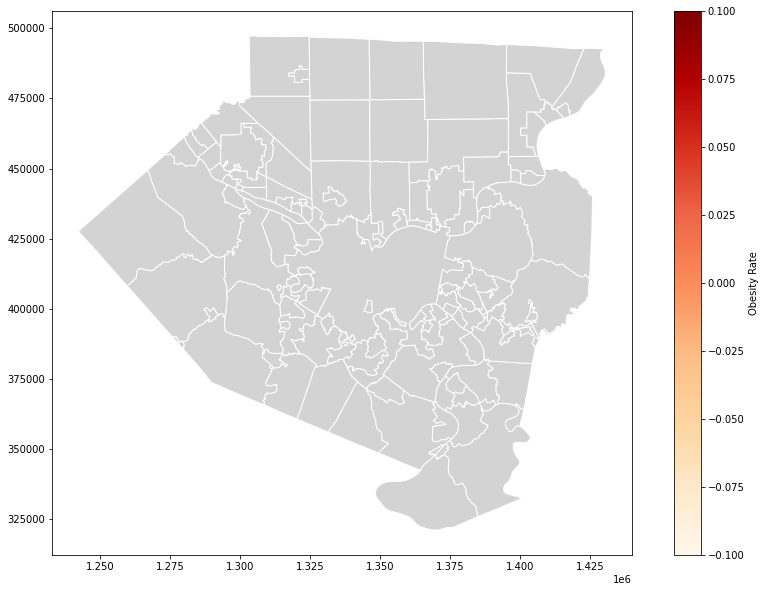

In [105]:
# draw colored map of neighborhoods with obesity rate
municipalities_map.plot(column='2006-2010 estimate of obesity', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Obesity Rate"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

<h3>The Best Neighborhood</h3>
From the obesity dataset, I determined that the best neighborhood in Pittsburgh is Northview Heights.

<h3>Conclusion</h3>
Though I had concluded that the best neighborhood was Northview Heights according to the obesity data, the neighborhood that we ultimately decided was the best was 